# Gender Classification: Keras Neural Network

#### By:

- Yuluka Gigante Muriel

---

## Table of contents

1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
    - [Data loading](#data-loading)
    - [Data preprocessing](#data-preprocessing)
3. [Model creation](#model-creation)
    - [Model V1 basic architecture](#model-v1-basic-architecture)
    - [Model V2 basic architecture](#model-v2-basic-architecture)
    - [Model V3 basic architecture](#model-v3-basic-architecture)
    - [Model V4 basic architecture](#model-v4-basic-architecture)
    - [Model V5 basic architecture](#model-v5-basic-architecture)
    - [Model V6 basic architecture](#model-v6-basic-architecture)
    - [Model V7](#model-v7)
    - [Model cost function and optimizer](#model-cost-function-and-optimizer)
4. [Training](#training)
    - [Model V1 Training](#model-v1-training)
    - [Model V2 Training](#model-v2-training)
    - [Model V3 Training](#model-v3-training)
    - [Model V4 Training](#model-v4-training)
    - [Model V5 Training](#model-v5-training)
    - [Model V6 Training](#model-v6-training)
    - [Model V7 Training](#model-v7-training)
    - [Model V1 metrics review](#model-v1-metrics-review)
    - [Model V2 metrics review](#model-v2-metrics-review)
    - [Model V3 metrics review](#model-v3-metrics-review)
    - [Model V4 metrics review](#model-v4-metrics-review)
    - [Model V5 metrics review](#model-v5-metrics-review)
    - [Model V6 metrics review](#model-v6-metrics-review)
    - [Model V7 metrics review](#model-v7-metrics-review)
5. [Testing](#testing)
    - [Testing Model V1](#testing-model-v1)
    - [Testing Model V2](#testing-model-v2)
    - [Testing Model V3](#testing-model-v3)
    - [Testing Model V4](#testing-model-v4)
    - [Testing Model V5](#testing-model-v5)
    - [Testing Model V6](#testing-model-v6)
    - [Testing Model V7](#testing-model-v7)
6. [Exporting](#exporting)
    - [Exporting models](#exporting-models)
7. [Conclusions](#conclusions)

---

## Introduction

This notebook contain a Neural Network (NN), using keras, used to classify human pictures into two different classes: Male and Female.

To develop this NN, I'll be using a total of 2000 pictures for training (1000 for male and 1000 for female), and a total of 400 pictures for test.

---

## Data Preparation

### Data Loading

In [2]:
import os
import numpy as np
from PIL import Image

def load_images(folder_path, img_limit=1000, img_size=64):
    """
    Load images from a folder and return them as a numpy array.	

    :param folder_path: path to the folder containing the images.
    :param img_limit: maximum number of images to load.
    :param img_size: size of the images to load.
    :return: numpy array containing the images.
    """

    x_train_male_orig_aux = []

    counter = 0

    for file in os.listdir(folder_path):
        if counter == img_limit:
            break

        img = Image.open(os.path.join(folder_path, file))
        img = img.resize((img_size, img_size))
        img_array = np.array(img)
        x_train_male_orig_aux.append(img_array)

        counter += 1
    
    return np.array(x_train_male_orig_aux)

**Images loading:**

In [3]:
# The paths to the folders containing the images for training
training_data_path_male = os.path.join('data', 'training', 'male')
training_data_path_female = os.path.join('data', 'training', 'female')

# Load the images. As the images are stored in two different folders, we need to load them separately and then concatenate them
x_train_orig = np.concatenate((load_images(training_data_path_male), load_images(training_data_path_female)), axis=0)

In [4]:
# The paths to the folders containing the images for testing
testing_data_path_male = os.path.join('data', 'validation', 'male')
testing_data_path_female = os.path.join('data', 'validation', 'female')

x_test_orig = np.concatenate((load_images(testing_data_path_male, 200), load_images(testing_data_path_female, 200)), axis=0)

**Labels loading:**

As I only have two classes (male and female), I'm gonna use 0es to represent females and 1s to represent males.

In [5]:
# A numpy array containing the labels for the training set. The first half represents the males and the second half represents the females
y_train_orig = np.concatenate(
    (
        np.full((1, int((x_train_orig.shape[0])/2)), 1),
        np.full((1, int((x_train_orig.shape[0])/2)), 0),
    ), 
    axis=1
)

y_test_orig = np.concatenate(
    (
        np.full((1, int((x_test_orig.shape[0])/2)), 1),
        np.full((1, int((x_test_orig.shape[0])/2)), 0),
    ), 
    axis=1
)

**Shapes review:**

In [139]:
print(f"Shape of training dataset: {x_train_orig.shape}")
print(f"Shape of testing dataset: {x_test_orig.shape}")

Shape of training dataset: (2000, 64, 64, 3)
Shape of testing dataset: (400, 64, 64, 3)


In [140]:
print(f"Shape of training labels: {y_train_orig.shape}")
print(f"Shape of testing labels: {y_test_orig.shape}")

Shape of training labels: (1, 2000)
Shape of testing labels: (1, 400)


A little visualization of the data:

Label: Male


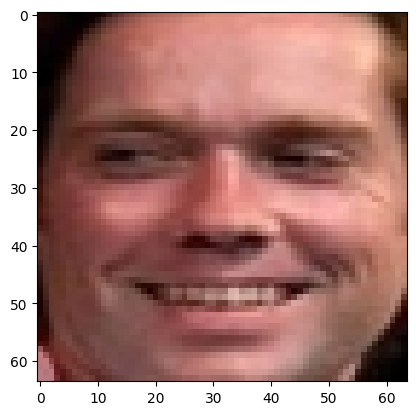

In [163]:
import matplotlib.pyplot as plt

print(f"Label: {'Male' if y_train_orig[0][0] == 1 else 'Female'}")
plt.imshow(x_train_orig[0])

Label: Male


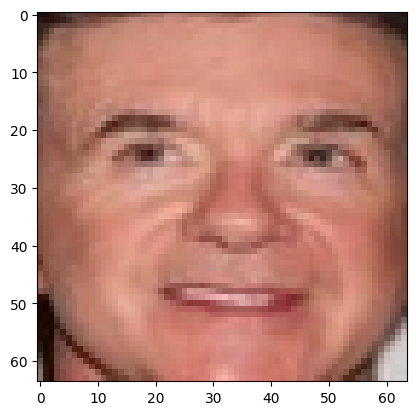

In [164]:
print(f"Label: {'Male' if y_test_orig[0][2] == 1 else 'Female'}")
plt.imshow(x_test_orig[2])

### Data preprocessing

I'm gonna prepare the data to be able to use it with the keras model.

**Shuffling:**

Since the images of the males were loaded first and then the females, the data are sorted. That means that the first half of the sets corresponds to males, and the second half to females.

So, I'm gonna shuffle the data in order to avoid overfitting due to the order.

In [6]:
from sklearn.utils import shuffle

y_train_orig = np.ravel(y_train_orig)
y_test_orig = np.ravel(y_test_orig)

x_train_orig, y_train_orig = shuffle(x_train_orig, y_train_orig, random_state=999)
x_test_orig, y_test_orig = shuffle(x_test_orig, y_test_orig, random_state=999)

Label: Female


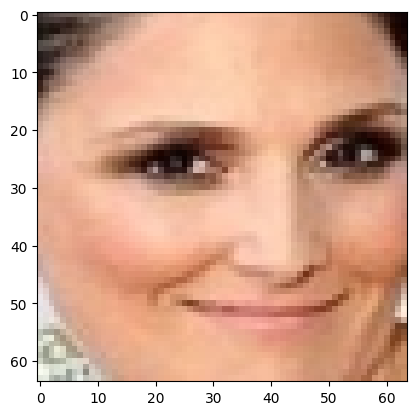

In [166]:
print(f"Label: {'Male' if y_train_orig[0] == 1 else 'Female'}")
plt.imshow(x_train_orig[0])

Label: Female


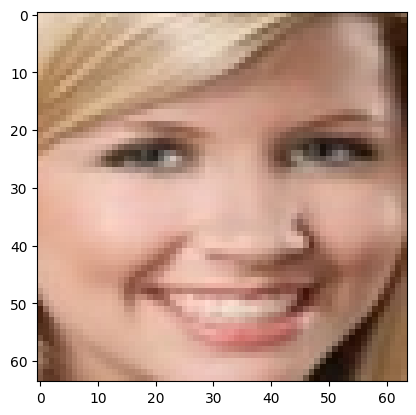

In [167]:
print(f"Label: {'Male' if y_test_orig[2] == 1 else 'Female'}")
plt.imshow(x_test_orig[2])

**Falttenization:**

In [7]:
# Faltten the images so each image is represented as a single column in the numpy array
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

print(f"Shape of flatten training data: {x_train_flatten.shape}")
print(f"Shape of flatten testing data: {x_test_flatten.shape}")

Shape of flatten training data: (12288, 2000)
Shape of flatten testing data: (12288, 400)


**Normalization:**

In [8]:
# Normalize the data so each pixel value is between 0 and 1
x_train = x_train_flatten / 255.
x_test = x_test_flatten / 255.

---

## Model creation

### Model V1 basic architecture

As a starting point, I'll create a first model (`model_v1`) composed by 3 layers. Then, depending on the results obtained, the architecture will change.

The first two layers will have only 16 neurons, and will use ReLu as the activation function.

The final layer will use sigmoid ('cause I'm dealing with a binary classification problem) with just one neuron.

**_Note:_** The last layer uses a single neuron because only one probability needs to be produced: the probability of belonging to the positive class ("male" in this case).

In [29]:
from keras import models
from keras.layers import Dense, Input
from keras import layers


if os.path.exists(os.path.join('models', 'model_v1.keras')):
    print("Loading model_v1 from disk")
    model_v1 = models.load_model('models/model_v1.keras')
    
else:
    print("Creating a new model_v1")
    model_v1 = models.Sequential()

    model_v1.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v1.add(Dense(16, activation='relu'))
    model_v1.add(Dense(16, activation='relu'))
    model_v1.add(Dense(1, activation='sigmoid'))

Creating a new model_v1


### Model V2 basic architecture

In this version, I'm going to work with almost the same model, but I will use `tanh` as the activation function of the hidden layers.

In [10]:
if os.path.exists(os.path.join('models', 'model_v2.keras')):
    print("Loading model_v2 from disk")
    model_v2 = models.load_model('models/model_v2.keras')

else:
    print("Creating a new model_v2")
    model_v2 = models.Sequential()

    model_v2.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v2.add(Dense(16, activation='tanh'))
    model_v2.add(Dense(16, activation='tanh'))
    model_v2.add(Dense(1, activation='sigmoid'))

Creating a new model_v2


### Model V3 basic architecture

In this version, I'm going to add more layers, and also more neurons to each layer.

In [41]:
if os.path.exists(os.path.join('models', 'model_v3.keras')):
    print("Loading model_v3 from disk")
    model_v3 = models.load_model('models/model_v3.keras')

else:
    print("Creating a new model_v3")
    model_v3 = models.Sequential()

    model_v3.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v3.add(Dense(64, activation='relu'))
    model_v3.add(Dense(64, activation='relu'))
    model_v3.add(Dense(32, activation='relu'))
    model_v3.add(Dense(32, activation='relu'))
    model_v3.add(Dense(16, activation='relu'))
    model_v3.add(Dense(1, activation='sigmoid'))

Creating a new model_v3


### Model V4 basic architecture

This version has the same architecture that `model_v1`, but it'll change the loss function.

In [58]:
from keras import models
from keras.layers import Dense, Input
from keras import layers


if os.path.exists(os.path.join('models', 'model_v4.keras')):
    print("Loading model_v4 from disk")
    model_v4 = models.load_model('models/model_v4.keras')
    
else:
    print("Creating a new model_v4")
    model_v4 = models.Sequential()

    model_v4.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v4.add(Dense(16, activation='relu'))
    model_v4.add(Dense(16, activation='relu'))
    model_v4.add(Dense(1, activation='sigmoid'))

Creating a new model_v4


### Model V5 basic architecture

This version has the same architecture that `model_v1`, but it'll change the optimizer to `rmsprop`.

In [69]:
from keras import models
from keras.layers import Dense, Input
from keras import layers


if os.path.exists(os.path.join('models', 'model_v5.keras')):
    print("Loading model_v5 from disk")
    model_v5 = models.load_model('models/model_v5.keras')
    
else:
    print("Creating a new model_v5")
    model_v5 = models.Sequential()

    model_v5.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v5.add(Dense(16, activation='relu'))
    model_v5.add(Dense(16, activation='relu'))
    model_v5.add(Dense(1, activation='sigmoid'))

Creating a new model_v5


### Model V6 basic architecture

As we'll see below, `model_v1` is version with the better performance, so I'm going to increase the epochs to try to improve it.

In [87]:
from keras import models
from keras.layers import Dense, Input
from keras import layers


if os.path.exists(os.path.join('models', 'model_v6.keras')):
    print("Loading model_v6 from disk")
    model_v6 = models.load_model('models/model_v6.keras')
    
else:
    print("Creating a new model_v6")
    model_v6 = models.Sequential()

    model_v6.add(Input(shape=(x_train.shape[0],))) # Input layer

    model_v6.add(Dense(16, activation='relu'))
    model_v6.add(Dense(16, activation='relu'))
    model_v6.add(Dense(1, activation='sigmoid'))

Creating a new model_v6


### Model V7

The previous models were built to find the better combination of parameters. Let's see if I can improve the performance by building a bigger model, with more layers, neurons, epochs.

To avoid overfitting, I'll use **_L2 regularization_**.

In [14]:
from keras import models, regularizers
from keras.layers import Dense, Input
from keras import layers


if os.path.exists(os.path.join('models', 'model_v7.keras')):
    print("Loading model_v7 from disk")
    model_v7 = models.load_model('models/model_v7.keras')
    
else:
    print("Creating a new model_v7")
    model_v7 = models.Sequential()

    model_v7.add(Input(shape=(x_train.shape[0],))) # Input layer
    
    model_v7.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model_v7.add(Dense(1, activation='sigmoid'))

Creating a new model_v7


### Model cost function and optimizer

I'll take into account the following possible functions, and the context explaining when to use them:

- **MSE (Mean Squared Error)** 

    Is a good function in regression problems, when the model has to predict a continuous value. It's not recommended when dealing with classification problems, as it isn't a good measure of the precision in this type of problem.

    Its formula: `MSE = 1/n ∑(y_i - ŷ_i)^2`

- **Cross-Entropy (logaritmic loss)** 

    Is the best option in classification problems (binary or multi-class). 

    Its formula: `L(y, ŷ) = -(y * log(ŷ) + (1 - y) * log(1 - ŷ))`

    This function penalizes the wrong predictions more severely the further away they are from the actual value. It is a good choice when the objective is to optimize the accuracy and the labeled data are numerous.

- **Log Loss (logistic loss)**

    It is similar to the previous function, but it is more commonly used in regression problems.

    Its formula: `L(y, ŷ) = -log(ŷ)`

    This function penalizes the wrong predictions more severely the further away they are from the actual value. It is a good choice when the objective is to optimize the accuracy, in regression problems, and the labeled data are numerous.

- **Mean Absolute Error (MAE) (L1 loss)**

    It is commonly use in regression problems.

    Its formula: `L(y, ŷ) = |y - ŷ|`

    This is a good choice in regression problems that require a more robust loss, as it's less sensitive to outliers. It is a good idea to use it when the data have outliers and we're looking for a more robust/stable loss.

- **Huber Loss**

    This function is a combination of MSE and MAE.

    Its formula: `L(y, ŷ) = { |y - ŷ|^2 if |y - ŷ| < δ, |y - ŷ| - 0.5 * δ^2`

    It is an ideal choice when dealing with regression problems that require an outliers resistant loss, with a penalization to great errors. 

**Model V1:**

As almost all the reviewed loss functions are used for regression problems, and my problem consists on a binary classification, I'll use **_Binary Cross-Entropy_** with **_Adam_** optimizer.

In [30]:
model_v1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

**Model V2:**

In [11]:
model_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

**Model V3:**

In [46]:
model_v3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

**Model V4:**

In [59]:
model_v4.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

**Model V5:**

In [70]:
model_v5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

**Model V6:**

In [88]:
model_v6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

**Model V7:**

In [15]:
model_v7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

---

## Training

### Model V1 Training

In [32]:
history_v1 = model_v1.fit(
    x_train.T, # Transpose the training data because the model expects the data to be in the shape (num_samples, num_features)
    y_train_orig, 
    epochs=20,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.7833 - loss: 0.5017 - val_acc: 0.8100 - val_loss: 0.4748
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7788 - loss: 0.5021 - val_acc: 0.7925 - val_loss: 0.4828
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7707 - loss: 0.5003 - val_acc: 0.7975 - val_loss: 0.4723
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7914 - loss: 0.4863 - val_acc: 0.8000 - val_loss: 0.4737
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7900 - loss: 0.4818 - val_acc: 0.8225 - val_loss: 0.4546
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8067 - loss: 0.4679 - val_acc: 0.8150 - val_loss: 0.4502
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8001 - loss: 0.4760 - val_acc: 0.8200 - val_loss: 0.4541
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8059 - loss: 0.4655 - val_acc: 0.8250 - val_loss: 0.4478
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8027 - loss: 0.4680 - 

### Model V2 Training

In [12]:
history_v2 = model_v2.fit(
    x_train.T,
    y_train_orig, 
    epochs=20,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.4957 - loss: 0.8337 - val_acc: 0.5000 - val_loss: 0.9049
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4940 - loss: 0.9029 - val_acc: 0.5000 - val_loss: 0.8589
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5087 - loss: 0.8388 - val_acc: 0.5000 - val_loss: 0.8171
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5036 - loss: 0.8051 - val_acc: 0.5000 - val_loss: 0.7811
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4986 - loss: 0.7755 - val_acc: 0.5000 - val_loss: 0.7517
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5040 - loss: 0.7434 - val_acc: 0.5000 - val_loss: 0.7292
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5020 - loss: 0.7241 - val_acc: 0.5000 - val_loss: 0.7130
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.5012 - loss: 0.7098 - val_acc: 0.5000 - val_loss: 0.7024
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4996 - loss: 0.7009 - 

### Model V3 Training

In [47]:
history_v3 = model_v3.fit(
    x_train.T,
    y_train_orig, 
    epochs=20,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - acc: 0.4956 - loss: 0.7291 - val_acc: 0.5175 - val_loss: 0.6746
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.5080 - loss: 0.7355 - val_acc: 0.5225 - val_loss: 0.6741
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6041 - loss: 0.6694 - val_acc: 0.7175 - val_loss: 0.6374
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6959 - loss: 0.6301 - val_acc: 0.7200 - val_loss: 0.5816
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6980 - loss: 0.5904 - val_acc: 0.7325 - val_loss: 0.5525
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7099 - loss: 0.5698 - val_acc: 0.7525 - val_loss: 0.5290
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7184 - loss: 0.5615 - val_acc: 0.7125 - val_loss: 0.5370
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7276 - loss: 0.5390 - val_acc: 0.7350 - val_loss: 0.5256
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7310 - loss: 0.5327 - 

### Model V4 Training

In [ ]:
history_v4 = model_v4.fit(
    x_train.T,
    y_train_orig, 
    epochs=20,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - acc: 0.5164 - loss: 0.3132 - val_acc: 0.5000 - val_loss: 0.4815
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5013 - loss: 0.4494 - val_acc: 0.7050 - val_loss: 0.2356
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5978 - loss: 0.2393 - val_acc: 0.5275 - val_loss: 0.2370
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5658 - loss: 0.2373 - val_acc: 0.6775 - val_loss: 0.2294
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6835 - loss: 0.2301 - val_acc: 0.7100 - val_loss: 0.2211
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6888 - loss: 0.2224 - val_acc: 0.6725 - val_loss: 0.2165
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6555 - loss: 0.2191 - val_acc: 0.7300 - val_loss: 0.2092
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7015 - loss: 0.2126 - val_acc: 0.7075 - val_loss: 0.2017
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6973 - loss: 0.2034 - 

### Model V5 Training

In [72]:
history_v5 = model_v5.fit(
    x_train.T,
    y_train_orig, 
    epochs=20,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.5774 - loss: 0.7317 - val_acc: 0.6400 - val_loss: 0.6041
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6692 - loss: 0.5899 - val_acc: 0.6475 - val_loss: 0.5973
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.6243 - loss: 0.6586 - val_acc: 0.6175 - val_loss: 0.6397
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5855 - loss: 0.6669 - val_acc: 0.6250 - val_loss: 0.6260
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6469 - loss: 0.6149 - val_acc: 0.6475 - val_loss: 0.5967
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6636 - loss: 0.6084 - val_acc: 0.6850 - val_loss: 0.5754
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6518 - loss: 0.6170 - val_acc: 0.6200 - val_loss: 0.6363
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6203 - loss: 0.6516 - val_acc: 0.6850 - val_loss: 0.6011
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6267 - loss: 0.6504 - 

### Model V6 Training

In [89]:
history_v6 = model_v6.fit(
    x_train.T,
    y_train_orig, 
    epochs=100,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig)
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.4872 - loss: 1.1678 - val_acc: 0.5000 - val_loss: 0.7672
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4993 - loss: 1.0078 - val_acc: 0.5050 - val_loss: 0.7418
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5159 - loss: 0.8623 - val_acc: 0.5225 - val_loss: 0.7457
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5273 - loss: 0.7848 - val_acc: 0.5975 - val_loss: 0.6507
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6129 - loss: 0.6828 - val_acc: 0.6275 - val_loss: 0.6252
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6140 - loss: 0.6438 - val_acc: 0.6950 - val_loss: 0.5878
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6912 - loss: 0.6042 - val_acc: 0.6850 - val_loss: 0.5647
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6914 - loss: 0.5752 - val_acc: 0.7400 - val_loss: 0.5472
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7103 - loss: 

### Model V7 Training

In [26]:
from keras.callbacks import Callback

class EarlyStoppingByValAccuracy(Callback):
    def __init__(self, monitor='val_acc', value=0.91, verbose=1):
        super(EarlyStoppingByValAccuracy, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get(self.monitor)

        if accuracy >= self.value:
            if self.verbose > 0:
                print(f'Early stopping at epoch {epoch+1} because accuracy reached {accuracy:.4f}')
            
            self.model.stop_training = True

In [28]:
early_stopping = EarlyStoppingByValAccuracy(monitor='val_acc', value=0.91, verbose=1)

history_v7 = model_v7.fit(
    x_train.T,
    y_train_orig, 
    epochs=1000,
    batch_size=512,
    validation_data=(x_test.T, y_test_orig),
    callbacks=[early_stopping]
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - acc: 0.9961 - loss: 0.0609 - val_acc: 0.8950 - val_loss: 0.5917
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9963 - loss: 0.0607 - val_acc: 0.8950 - val_loss: 0.5785
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9970 - loss: 0.0573 - val_acc: 0.8950 - val_loss: 0.5798
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9971 - loss: 0.0559 - val_acc: 0.8950 - val_loss: 0.5819
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9970 - loss: 0.0573 - val_acc: 0.8925 - val_loss: 0.5641
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9959 - loss: 0.0626 - val_acc: 0.8925 - val_loss: 0.5809
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9974 - loss: 0.0542 - val_acc: 0.8950 - val_loss: 0.6077
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9968 - loss: 0.0585 - val_acc: 0.8925 - val_loss: 0.5702
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9962

### Model V1 metrics review

Let's see the behaviour of the model.

**Loss during training:**

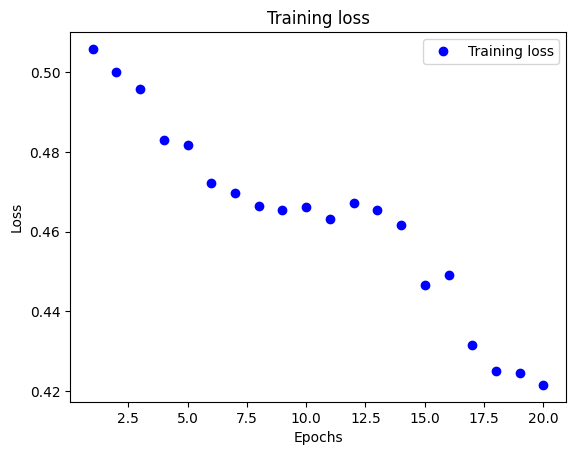

In [33]:
import matplotlib.pyplot as plt

training_loss_v1 = history_v1.history['loss']
epochs_v1 = range(1, 21)

plt.plot(epochs_v1, training_loss_v1, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

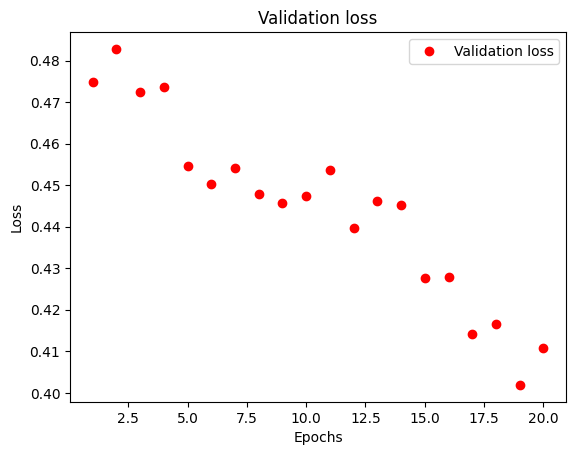

In [34]:
validation_loss_v1 = history_v1.history['val_loss']
epochs_v1 = range(1, 21)

plt.plot(epochs_v1, validation_loss_v1, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

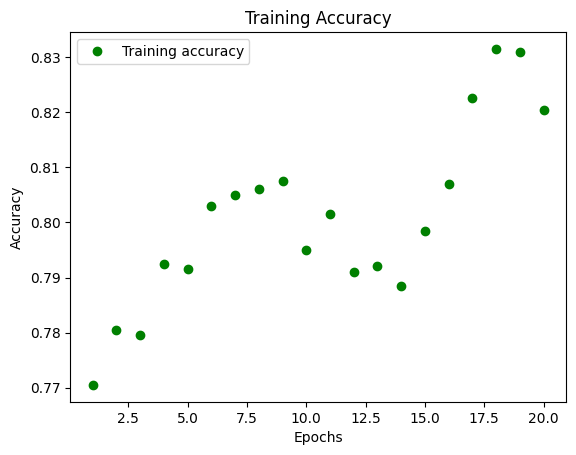

In [35]:
training_acc_v1 = history_v1.history['acc']
epochs_v1 = range(1, 21)

plt.plot(epochs_v1, training_acc_v1, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

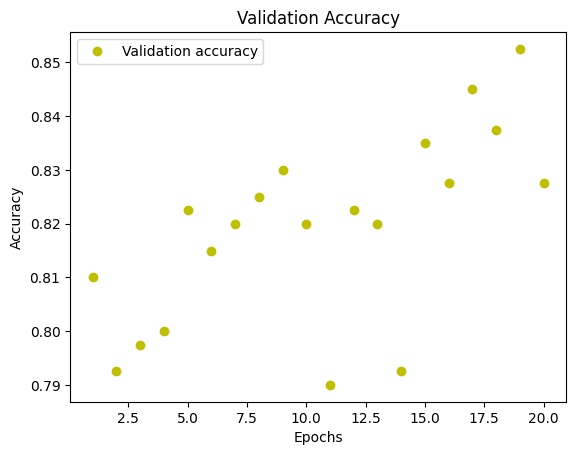

In [36]:
validation_acc_v1 = history_v1.history['val_acc']
epochs_v1 = range(1, 21)

plt.plot(epochs_v1, validation_acc_v1, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V2 metrics review

Let's see the behaviour of the model.

**Loss during training:**

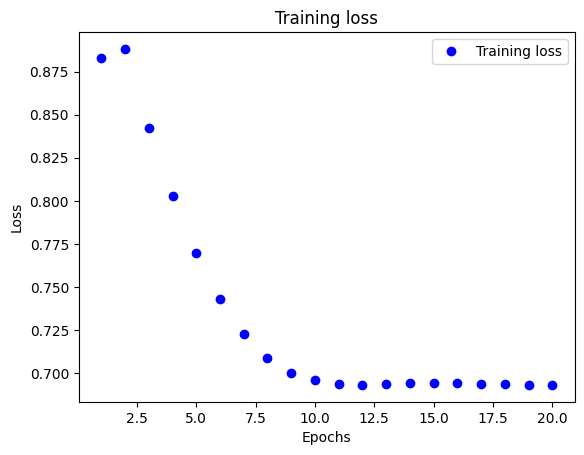

In [13]:
import matplotlib.pyplot as plt

training_loss_v2 = history_v2.history['loss']
epochs_v2 = range(1, 21)

plt.plot(epochs_v2, training_loss_v2, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

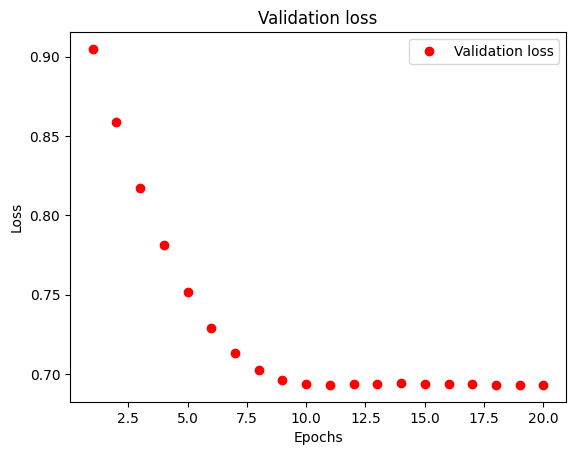

In [14]:
validation_loss_v2 = history_v2.history['val_loss']
epochs_v2 = range(1, 21)

plt.plot(epochs_v2, validation_loss_v2, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

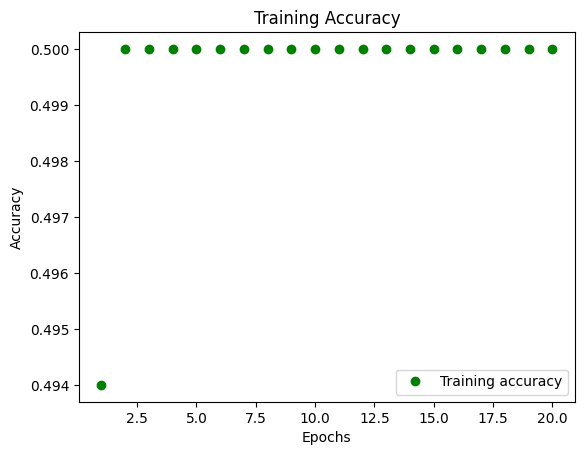

In [15]:
training_acc_v2 = history_v2.history['acc']
epochs_v2 = range(1, 21)

plt.plot(epochs_v2, training_acc_v2, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

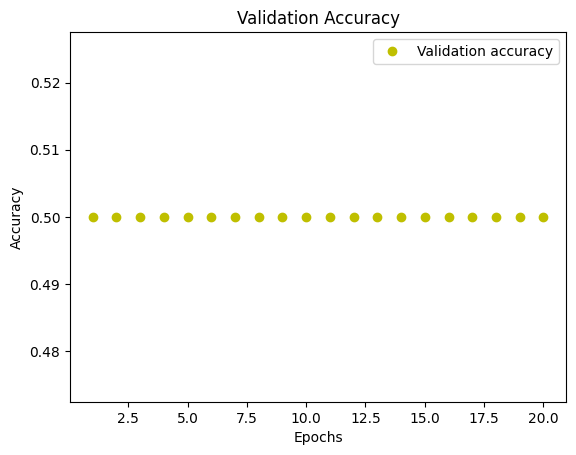

In [16]:
validation_acc_v2 = history_v2.history['val_acc']
epochs_v2 = range(1, 21)

plt.plot(epochs_v2, validation_acc_v2, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V3 metrics review

Let's see the behaviour of the model.

**Loss during training:**

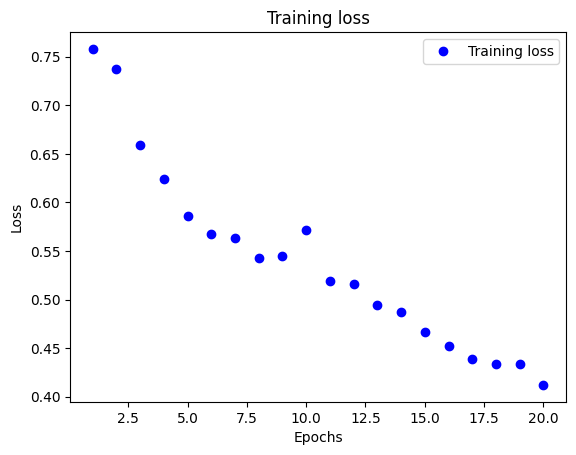

In [48]:
import matplotlib.pyplot as plt

training_loss_v3 = history_v3.history['loss']
epochs_v3 = range(1, 21)

plt.plot(epochs_v3, training_loss_v3, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

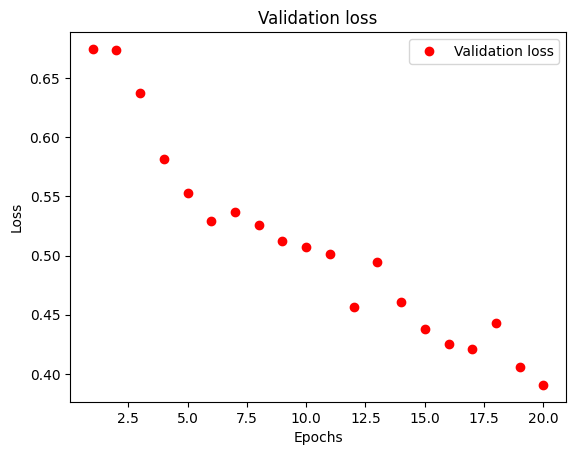

In [49]:
validation_loss_v3 = history_v3.history['val_loss']
epochs_v3 = range(1, 21)

plt.plot(epochs_v3, validation_loss_v3, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

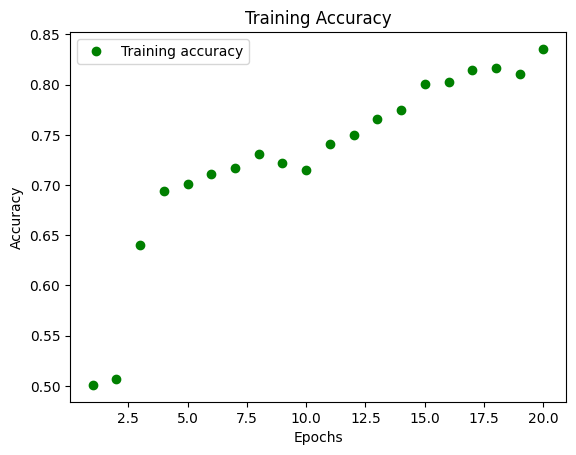

In [50]:
training_acc_v3 = history_v3.history['acc']
epochs_v3 = range(1, 21)

plt.plot(epochs_v3, training_acc_v3, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

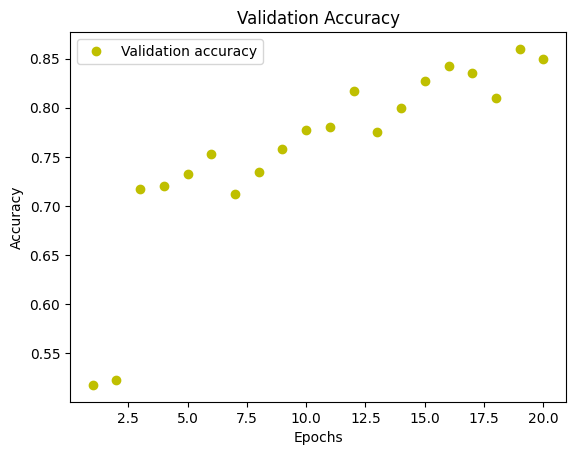

In [52]:
validation_acc_v3 = history_v3.history['val_acc']
epochs_v3 = range(1, 21)

plt.plot(epochs_v3, validation_acc_v3, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V4 metrics review

Let's see the behaviour of the model.

**Loss during training:**

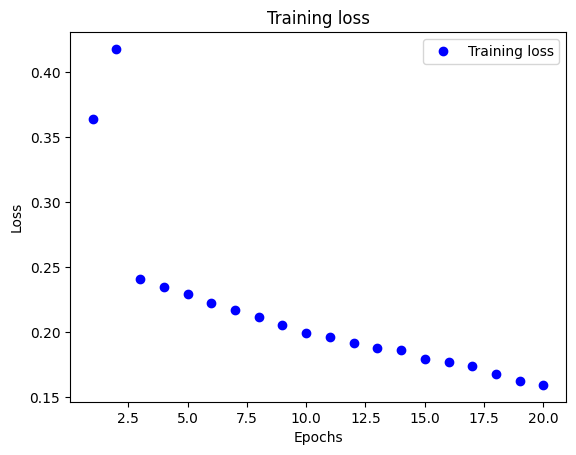

In [61]:
import matplotlib.pyplot as plt

training_loss_v4 = history_v4.history['loss']
epochs_v4 = range(1, 21)

plt.plot(epochs_v4, training_loss_v4, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

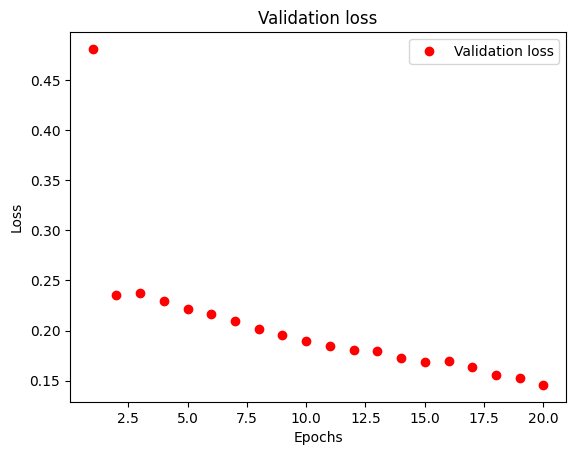

In [62]:
validation_loss_v4 = history_v4.history['val_loss']
epochs_v4 = range(1, 21)

plt.plot(epochs_v4, validation_loss_v4, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

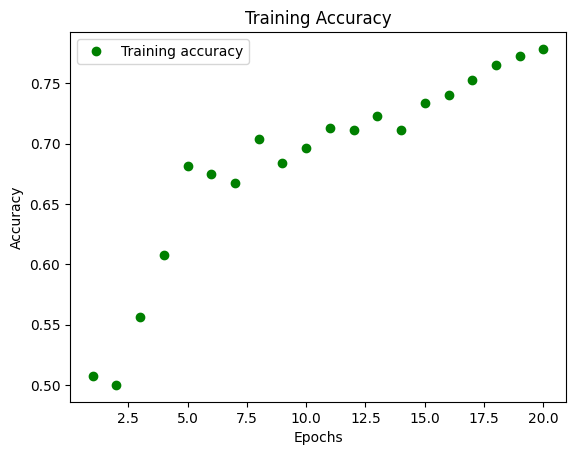

In [63]:
training_acc_v4 = history_v4.history['acc']
epochs_v4 = range(1, 21)

plt.plot(epochs_v4, training_acc_v4, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

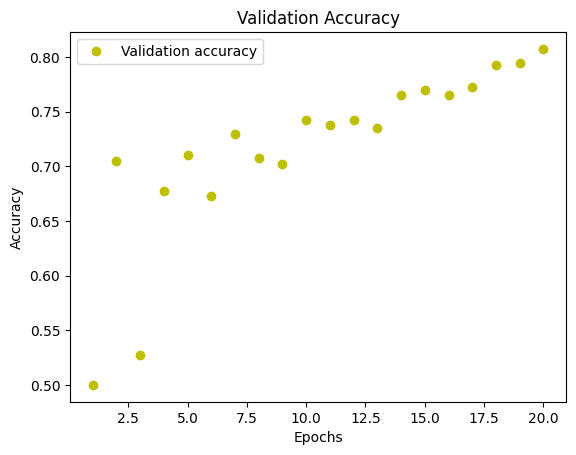

In [64]:
validation_acc_v4 = history_v4.history['val_acc']
epochs_v4 = range(1, 21)

plt.plot(epochs_v4, validation_acc_v4, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V5 metrics review

Let's see the behaviour of the model.

**Loss during training:**

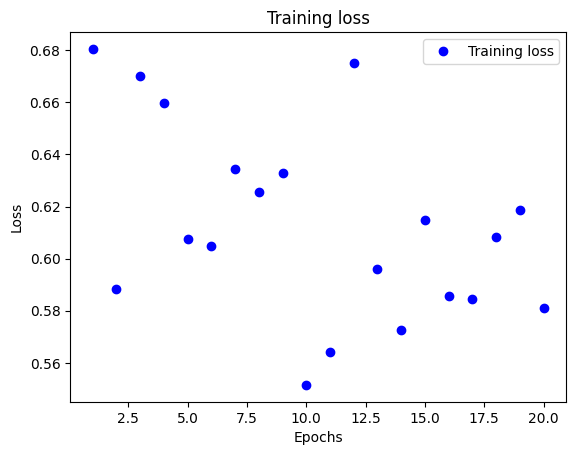

In [73]:
import matplotlib.pyplot as plt

training_loss_v5 = history_v5.history['loss']
epochs_v5 = range(1, 21)

plt.plot(epochs_v5, training_loss_v5, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

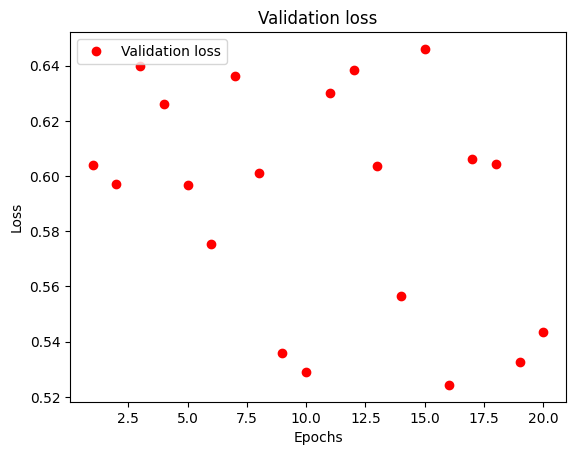

In [74]:
validation_loss_v5 = history_v5.history['val_loss']
epochs_v5 = range(1, 21)

plt.plot(epochs_v5, validation_loss_v5, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

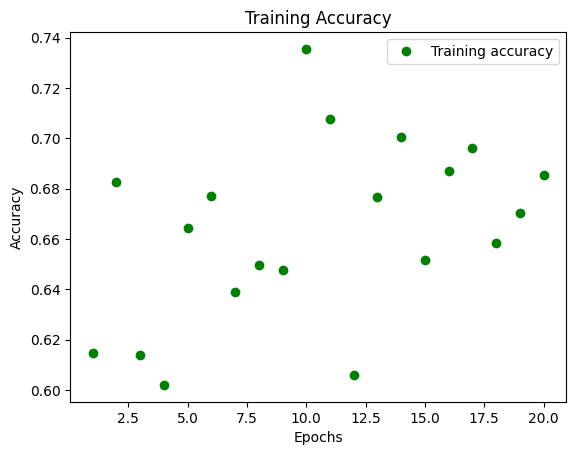

In [75]:
training_acc_v5 = history_v5.history['acc']
epochs_v5 = range(1, 21)

plt.plot(epochs_v5, training_acc_v5, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

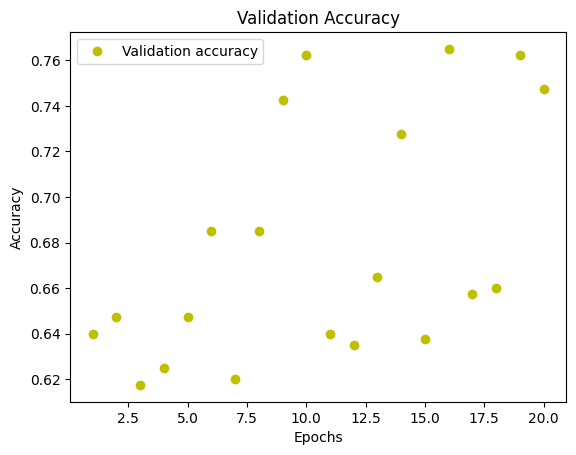

In [92]:
validation_acc_v5 = history_v5.history['val_acc']
epochs_v5 = range(1, 21)

plt.plot(epochs_v5, validation_acc_v5, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V6 metrics review

Let's see the behaviour of the model.

**Loss during training:**

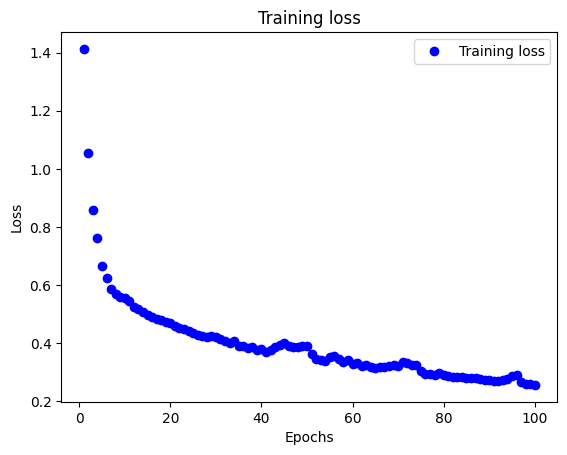

In [94]:
import matplotlib.pyplot as plt

training_loss_v6 = history_v6.history['loss']
epochs_v6 = range(1, 101)

plt.plot(epochs_v6, training_loss_v6, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

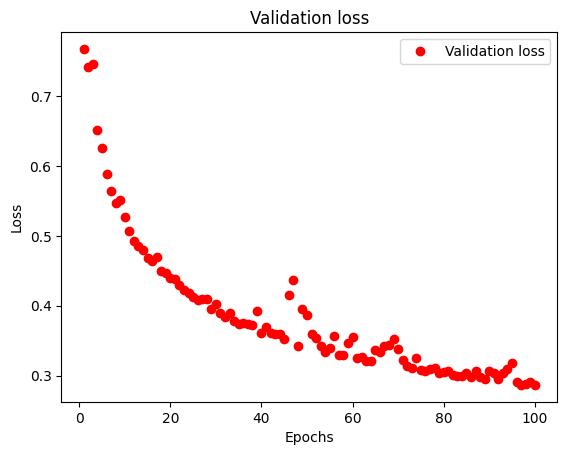

In [95]:
validation_loss_v6 = history_v6.history['val_loss']
epochs_v6 = range(1, 101)

plt.plot(epochs_v6, validation_loss_v6, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

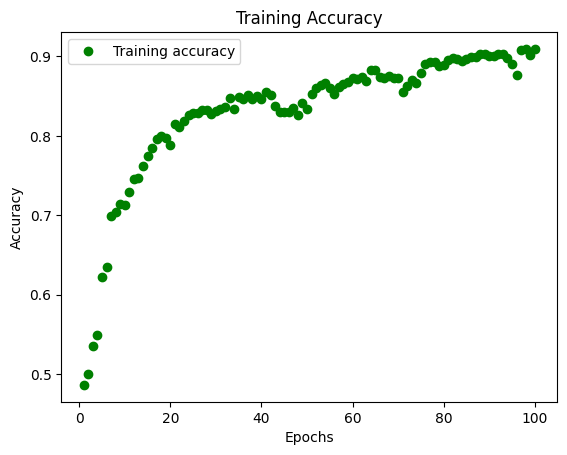

In [96]:
training_acc_v6 = history_v6.history['acc']
epochs_v6 = range(1, 101)

plt.plot(epochs_v6, training_acc_v6, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

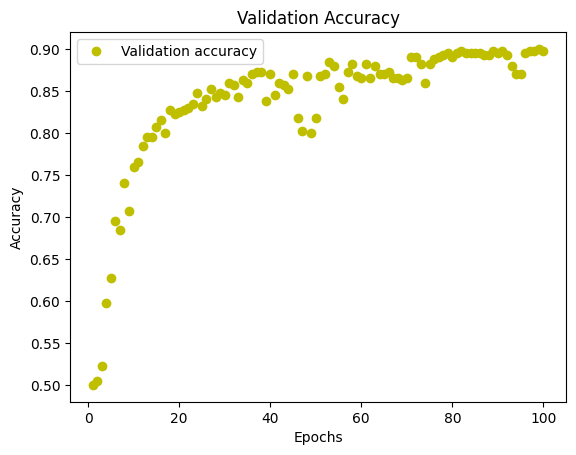

In [97]:
validation_acc_v6 = history_v6.history['val_acc']
epochs_v6 = range(1, 101)

plt.plot(epochs_v6, validation_acc_v6, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model V7 metrics review

Let's see the behaviour of the model.

**Loss during training:**

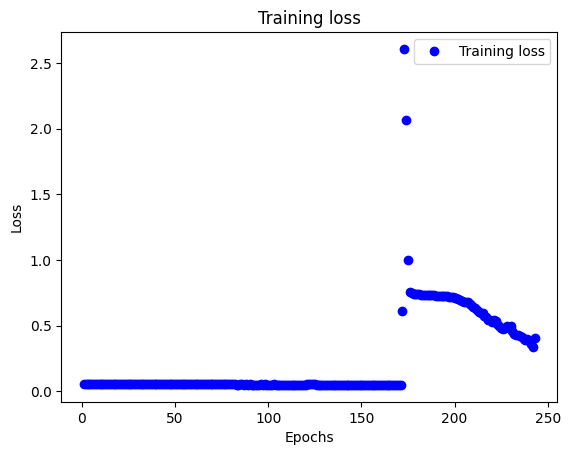

In [29]:
import matplotlib.pyplot as plt

training_loss_v7 = history_v7.history['loss']
epochs_v7 = range(1, 244)

plt.plot(epochs_v7, training_loss_v7, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Validation loss:**

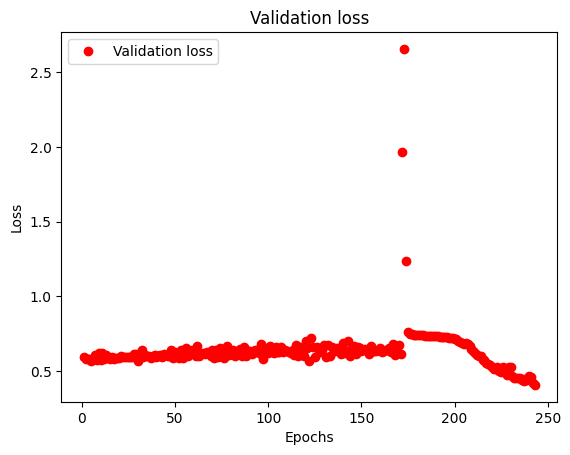

In [30]:
validation_loss_v7 = history_v7.history['val_loss']
epochs_v7 = range(1, 244)

plt.plot(epochs_v7, validation_loss_v7, 'ro', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training accuracy:**

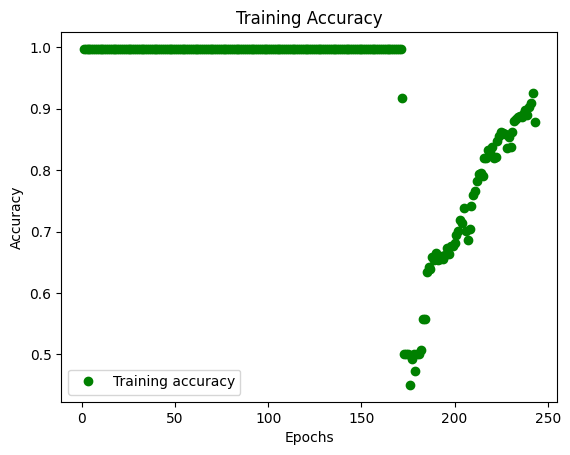

In [31]:
training_acc_v7 = history_v7.history['acc']
epochs_v7 = range(1, 244)

plt.plot(epochs_v7, training_acc_v7, 'go', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Validation accuracy:**

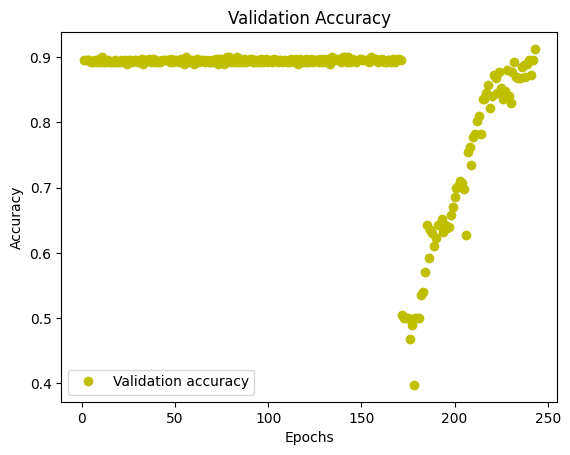

In [32]:
validation_acc_v7 = history_v7.history['val_acc']
epochs_v7 = range(1, 244)

plt.plot(epochs_v7, validation_acc_v7, 'yo', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Models Comparison

Let's compare the previously trained models to see which one is the best one.

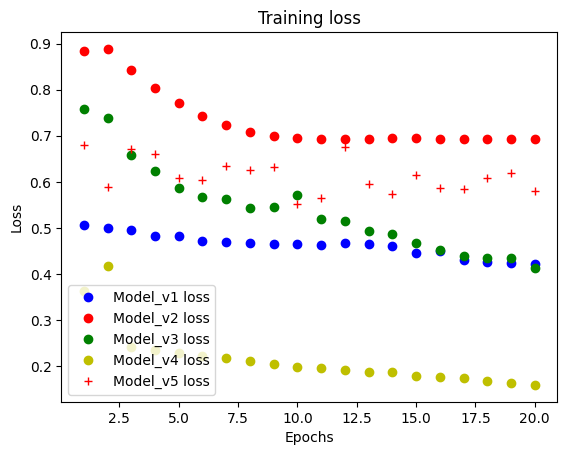

In [103]:
import matplotlib.pyplot as plt

plt.plot(epochs_v1, training_loss_v1, 'bo', label='Model_v1 loss')
plt.plot(epochs_v2, training_loss_v2, 'ro', label='Model_v2 loss')
plt.plot(epochs_v3, training_loss_v3, 'go', label='Model_v3 loss')
plt.plot(epochs_v4, training_loss_v4, 'yo', label='Model_v4 loss')
plt.plot(epochs_v5, training_loss_v5, 'r+', label='Model_v5 loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

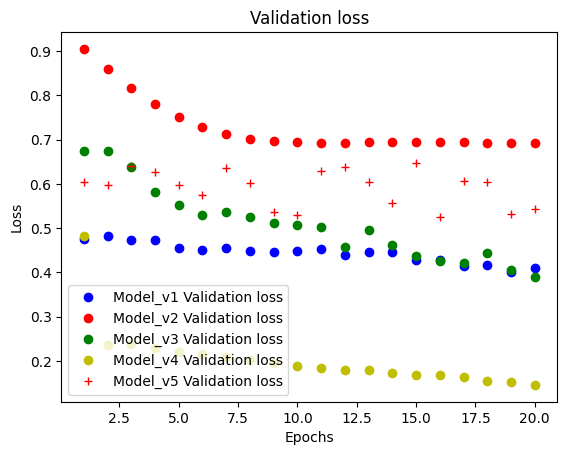

In [102]:
import matplotlib.pyplot as plt

plt.plot(epochs_v1, validation_loss_v1, 'bo', label='Model_v1 Validation loss')
plt.plot(epochs_v2, validation_loss_v2, 'ro', label='Model_v2 Validation loss')
plt.plot(epochs_v3, validation_loss_v3, 'go', label='Model_v3 Validation loss')
plt.plot(epochs_v4, validation_loss_v4, 'yo', label='Model_v4 Validation loss')
plt.plot(epochs_v5, validation_loss_v5, 'r+', label='Model_v5 Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

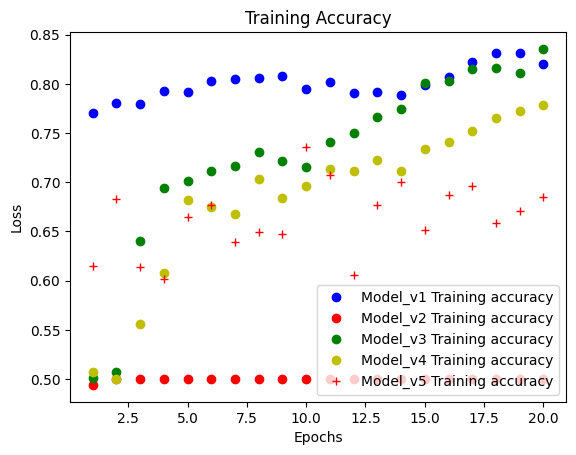

In [85]:
import matplotlib.pyplot as plt

plt.plot(epochs_v1, training_acc_v1, 'bo', label='Model_v1 Training accuracy')
plt.plot(epochs_v2, training_acc_v2, 'ro', label='Model_v2 Training accuracy')
plt.plot(epochs_v3, training_acc_v3, 'go', label='Model_v3 Training accuracy')
plt.plot(epochs_v4, training_acc_v4, 'yo', label='Model_v4 Training accuracy')
plt.plot(epochs_v5, training_acc_v5, 'r+', label='Model_v5 Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

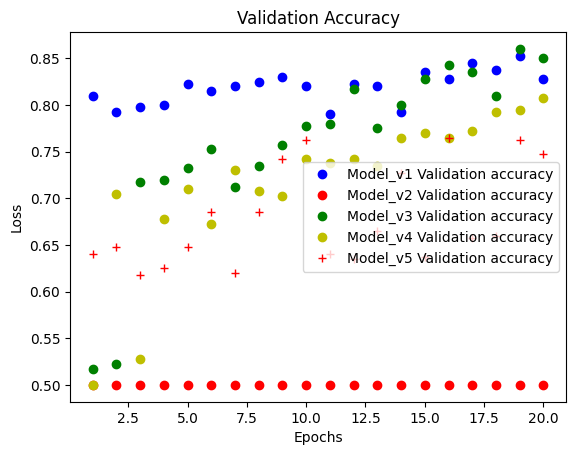

In [86]:
import matplotlib.pyplot as plt

plt.plot(epochs_v1, validation_acc_v1, 'bo', label='Model_v1 Validation accuracy')
plt.plot(epochs_v2, validation_acc_v2, 'ro', label='Model_v2 Validation accuracy')
plt.plot(epochs_v3, validation_acc_v3, 'go', label='Model_v3 Validation accuracy')
plt.plot(epochs_v4, validation_acc_v4, 'yo', label='Model_v4 Validation accuracy')
plt.plot(epochs_v5, validation_acc_v5, 'r+', label='Model_v5 Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---

## Testing

### Testing Model V1

I'll test the previously trained model (`model_v1`) with four different samples to see how its accuracy.

In [35]:
external_samples_orig = load_images('data/external_samples', 6)
external_samples_flatten = external_samples_orig.reshape(external_samples_orig.shape[0], -1).T
external_samples = external_samples_flatten / 255.

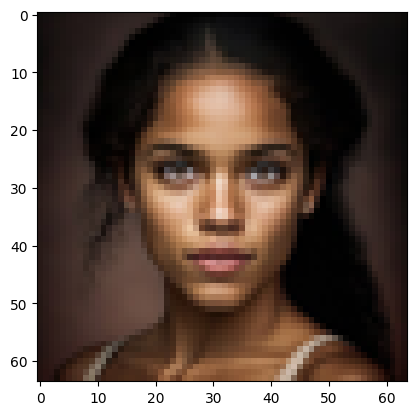

In [187]:
plt.imshow(external_samples_orig[0])

In [188]:
external_samples_predictions = model_v1.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Prediction: Female


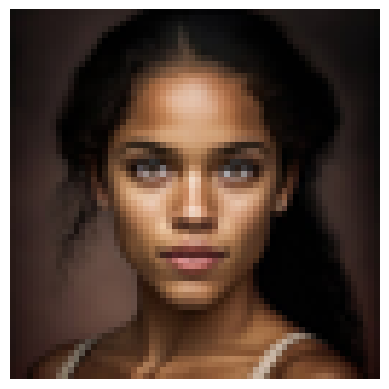

Prediction: Male


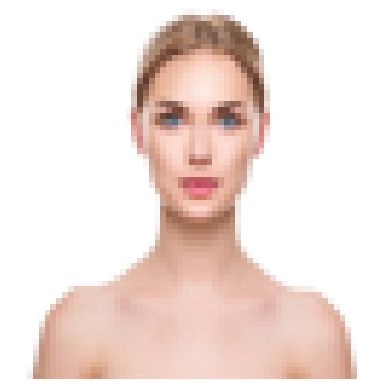

Prediction: Male


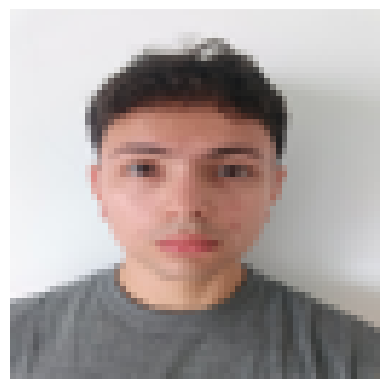

Prediction: Male


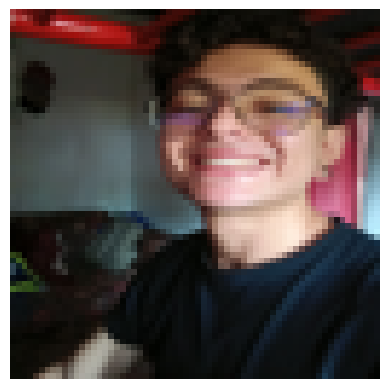

In [191]:
for image, prediction in zip(external_samples_orig, external_samples_predictions):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V2

In [109]:
external_samples_predictions_v2 = model_v2.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Prediction: Male


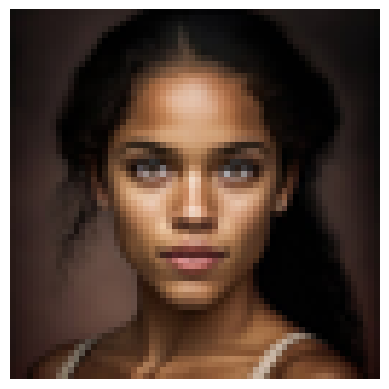

Prediction: Male


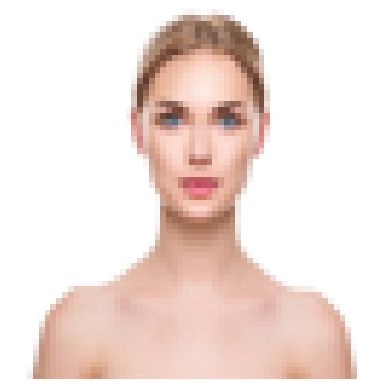

Prediction: Male


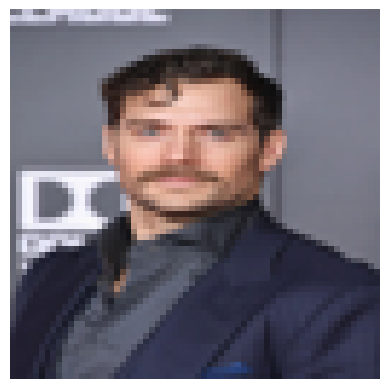

Prediction: Male


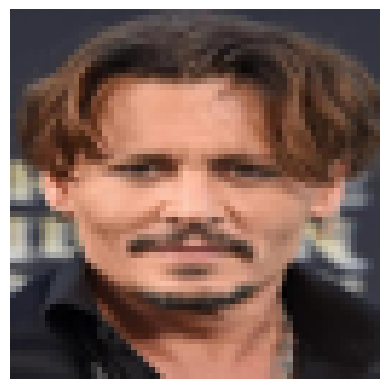

Prediction: Male


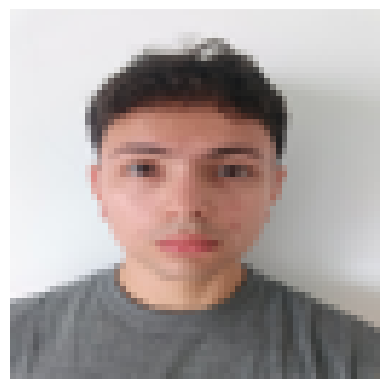

Prediction: Male


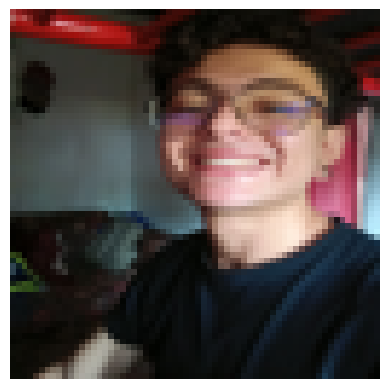

In [110]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v2):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V3

In [111]:
external_samples_predictions_v3 = model_v3.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Prediction: Female


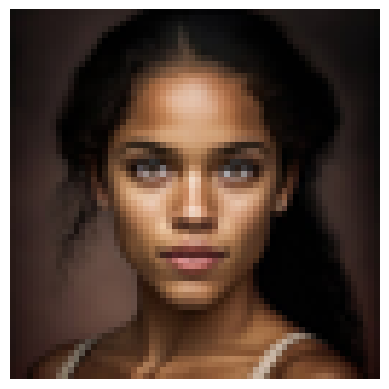

Prediction: Male


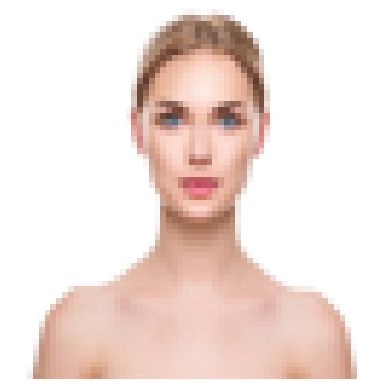

Prediction: Male


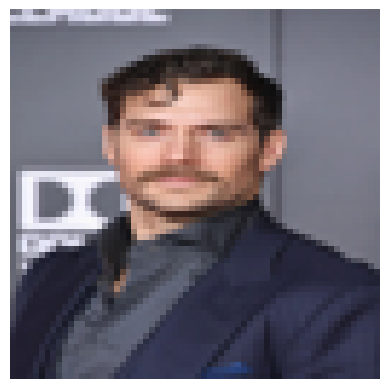

Prediction: Female


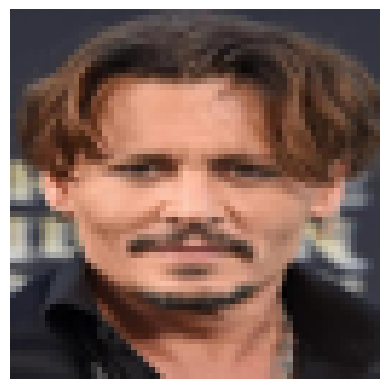

Prediction: Male


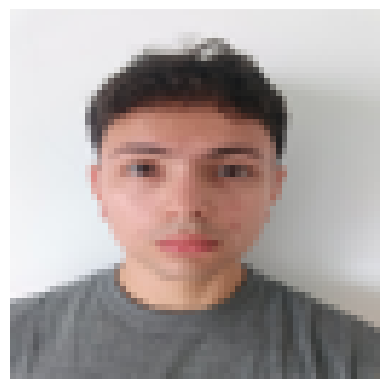

Prediction: Male


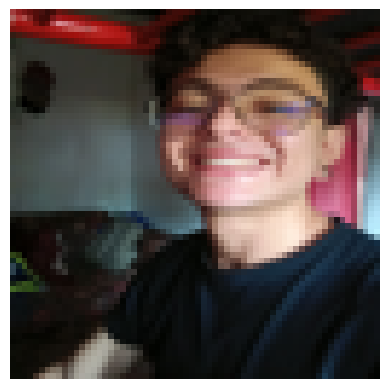

In [112]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v3):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V4

In [113]:
external_samples_predictions_v4 = model_v4.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Prediction: Female


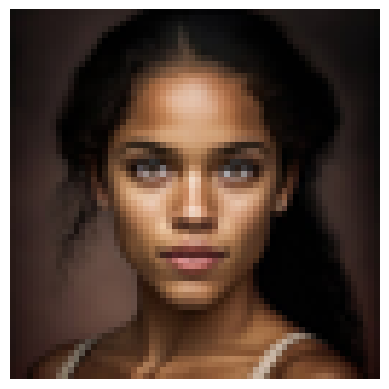

Prediction: Male


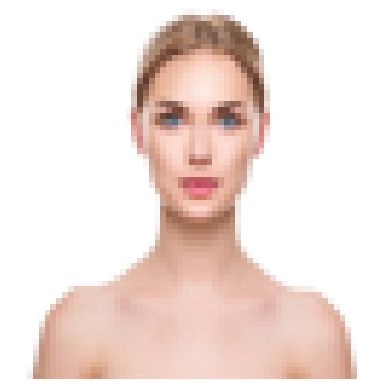

Prediction: Male


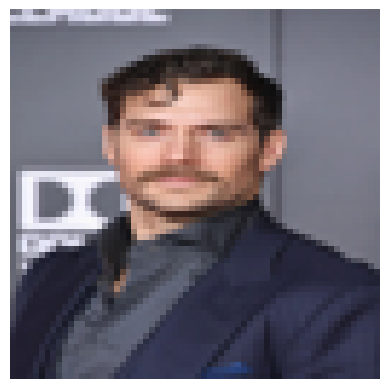

Prediction: Female


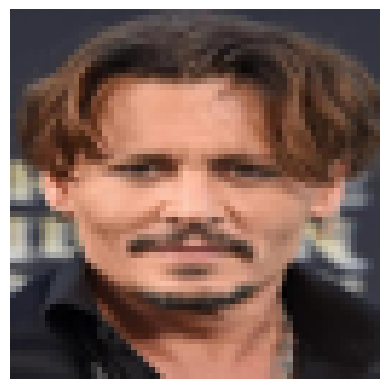

Prediction: Male


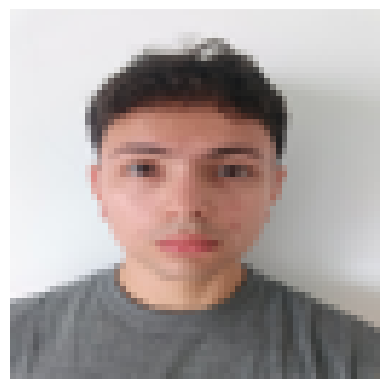

Prediction: Male


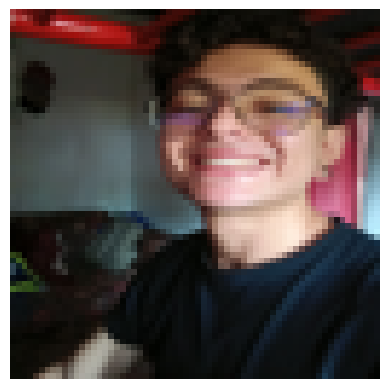

In [114]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v4):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V5

In [116]:
external_samples_predictions_v5 = model_v5.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Prediction: Female


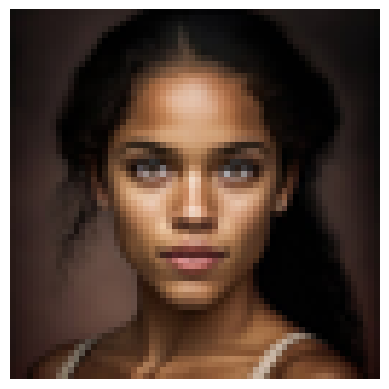

Prediction: Male


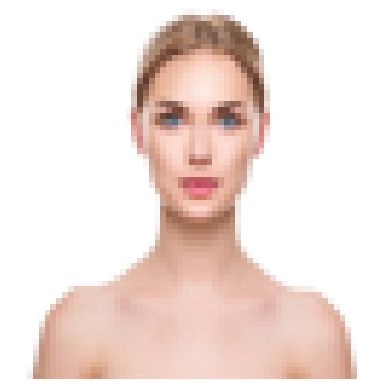

Prediction: Male


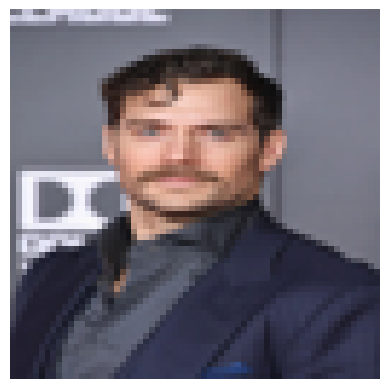

Prediction: Female


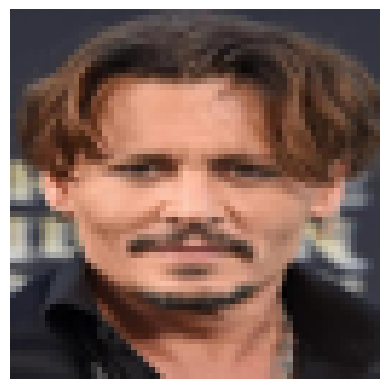

Prediction: Male


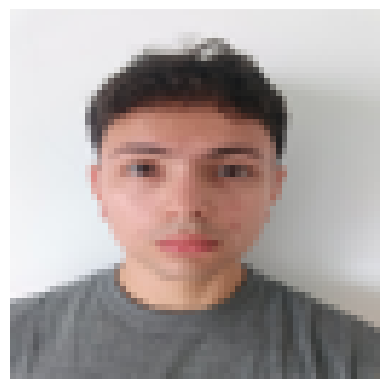

Prediction: Male


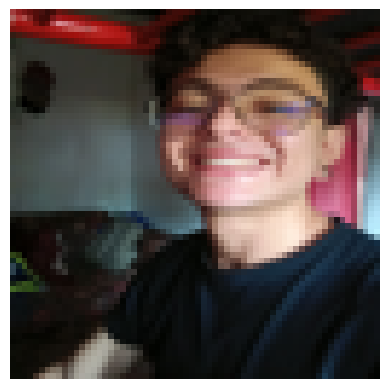

In [117]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v5):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V6

In [118]:
external_samples_predictions_v6 = model_v6.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Prediction: Female


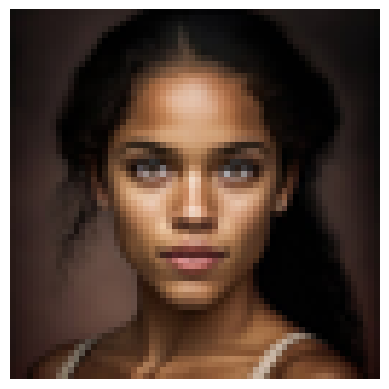

Prediction: Male


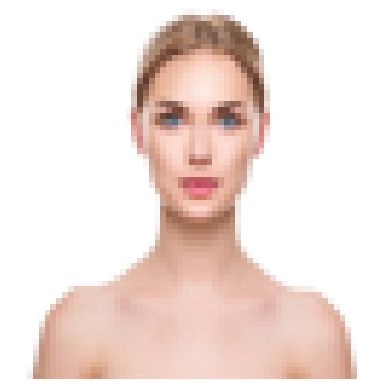

Prediction: Male


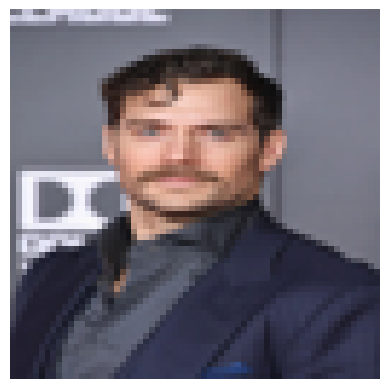

Prediction: Female


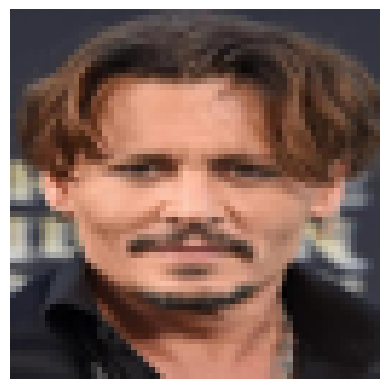

Prediction: Male


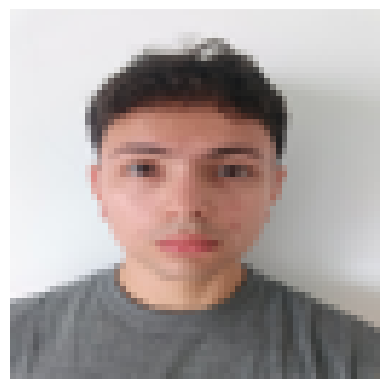

Prediction: Male


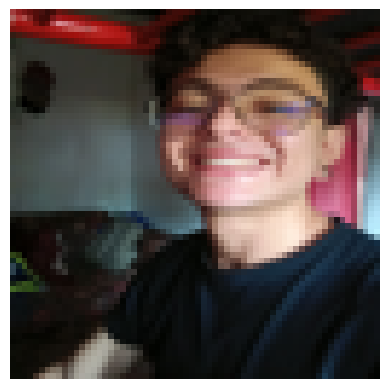

In [119]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v6):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Testing Model V7

In [36]:
external_samples_predictions_v7 = model_v7.predict(external_samples.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Prediction: Female


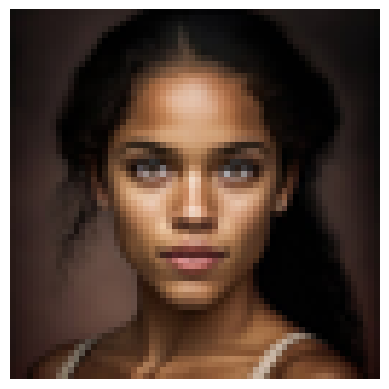

Prediction: Male


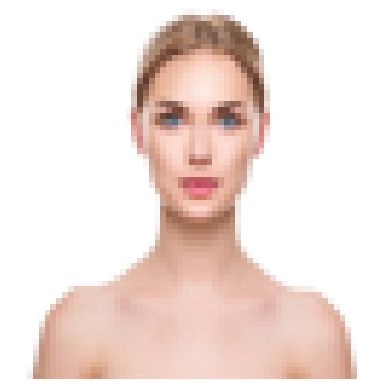

Prediction: Male


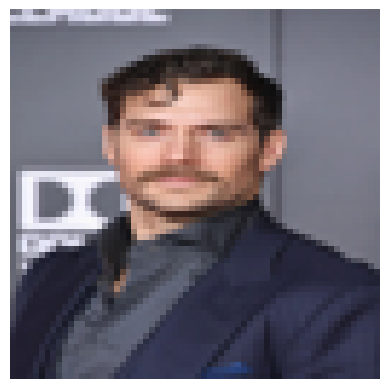

Prediction: Male


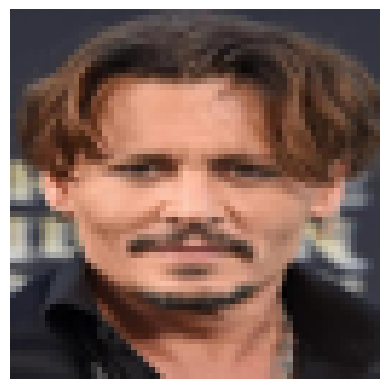

Prediction: Male


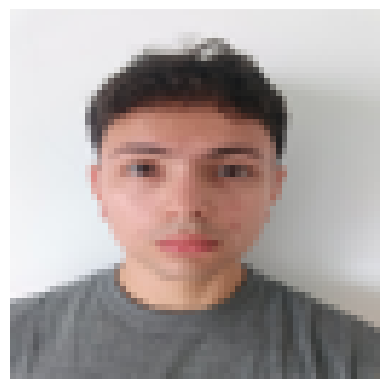

Prediction: Male


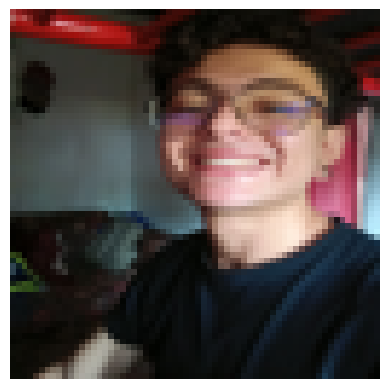

In [37]:
for image, prediction in zip(external_samples_orig, external_samples_predictions_v7):
    prediction = (prediction >= 0.5).astype(int)

    print(f"Prediction: {'Male' if prediction == 1 else 'Female'}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

---

## Exporting

### Exporting models

Let's export the previously trained models to be able to use it in another environment.

In [33]:
model_v1.save('models/model_v1.keras')
model_v2.save('models/model_v2.keras')
model_v3.save('models/model_v3.keras')
model_v4.save('models/model_v4.keras')
model_v5.save('models/model_v5.keras')
model_v6.save('models/model_v6.keras')
model_v7.save('models/model_v7.keras')

---

## Conclusions

With this comparison, we can see that `model_v1` is much better than `model_v2`, as its accuracy in test and training scenarios is much higher, as well as its loss is much lower. We can conclude, comparing those models, that `tahn` is not a good activation function for this problem.

Now, comparing `model_v1` with `model_v3` we can see that both models have similar performance, but `model_v1` is smaller, so it is a better choice over `model_v3` because it requires less computational resources.

Concerning to `model_v4`, we can see that varying the loss function (to MSE) we can minimize the loss, but the accuracy is also lower than the other models. We can say that **_Binary Cross-Entropy_** is better in this type of problems.

In the case of `model_v5`, we can observe how changing the optimizer can worsen the performance of our model. According to the results of this version, we can conclude that **_Adam_** optimizer is better than **_rmsprop_** (in this case).

Although we cannot compare the previous models with the sixth one (`model_v6`), since it increases the number of epochs, we can see that this one has managed to obtain better accuracy without falling into overfitting.

Finally, the last version of the model, that is the bigger than all the others, and implements regularization and earlystop, is the best one. However, the difference between that version, and first one, is not that big, so we can say that a smaller model stills being a very good option, due to its high performance and low computational requirements.

Also, we found out that the following architecture is a good one for binary classification problems:

- Layers: few.
- Neurons: few.
- Loss function: Binary Cross-Entropy.
- Optimizer: Adam.
- Activation function: ReLu.
- Epochs: over 100.
